In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Dataset - https://www.kaggle.com/datasets/warcoder/cats-vs-dogs-vs-birds-audio-classification

data = '/content/Audio Classification.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('Extraction Successful')

Extraction Successful


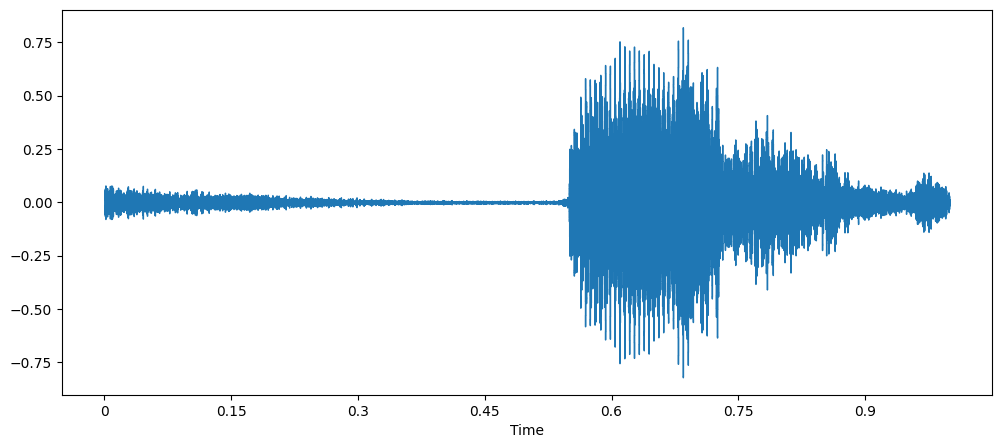

In [ ]:
bird_sample = '/content/Animals/bird/00b01445_nohash_0.wav'

data, sample_rate = librosa.load(bird_sample)
plt.figure(figsize = (12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
Audio(bird_sample)

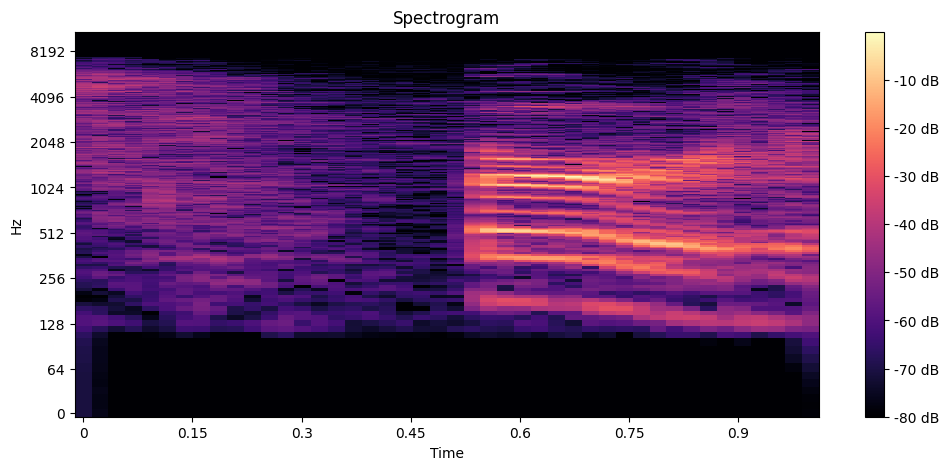

In [ ]:
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

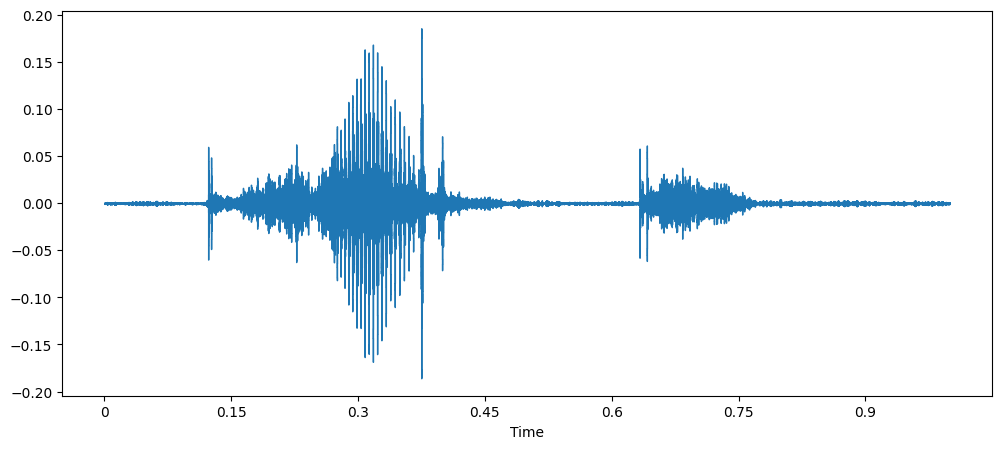

In [ ]:
cat_sample = '/content/Animals/cat/00f0204f_nohash_2.wav'

data, sample_rate = librosa.load(cat_sample)
plt.figure(figsize = (12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
Audio(cat_sample)

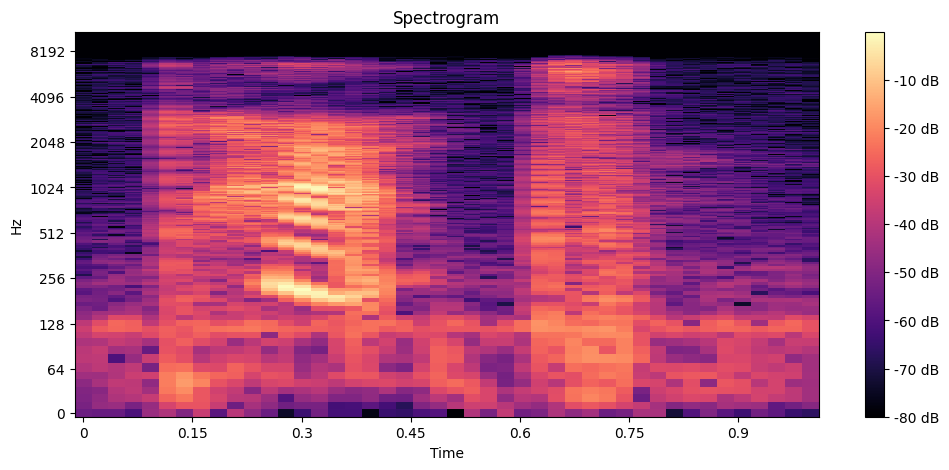

In [ ]:
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

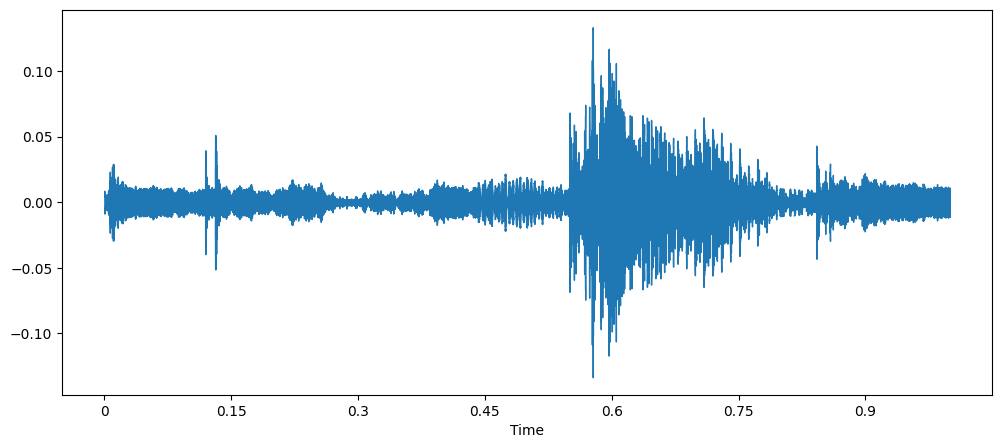

In [ ]:
dog_sample = '/content/Animals/dog/012c8314_nohash_0.wav'

data, sample_rate = librosa.load(dog_sample)
plt.figure(figsize = (12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [ ]:
Audio(dog_sample)

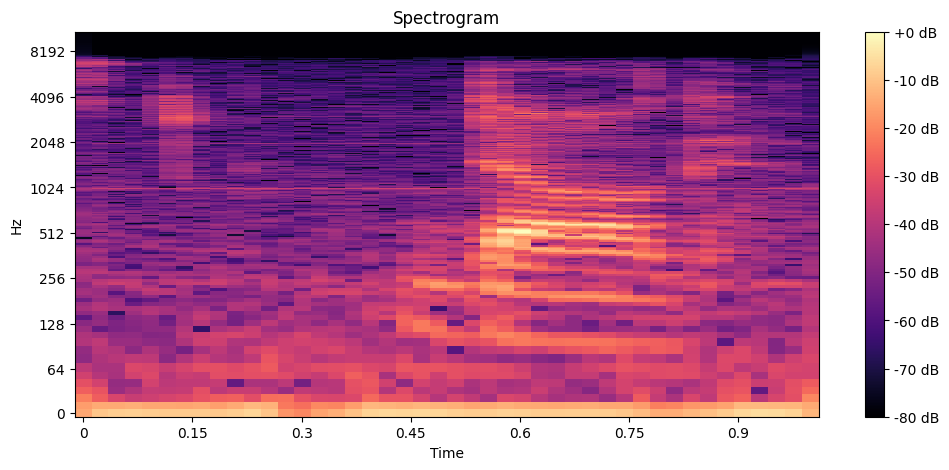

In [ ]:
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [ ]:
def features_extractor(file):
    audio_data, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [ ]:
!pip install resampy

In [ ]:
import resampy

extracted_features = []
directory = '/content/Animals'

for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        data = features_extractor(file_path)
        extracted_features.append([data, folder])

In [ ]:
df = pd.DataFrame(extracted_features, columns=['Feature', 'Label'])

In [ ]:
df

,Feature,Label
0,"[-220.88135, 124.92564, -32.186447, 41.897816,...",bird
1,"[-329.52676, 162.84978, -31.765291, 2.8696768,...",bird
2,"[-564.5887, 124.43299, 12.922336, -3.3250136, ...",bird
3,"[-340.8308, 170.0172, -29.501244, -0.022476804...",bird
4,"[-499.36682, 139.23256, -6.690593, 39.83699, -...",bird
...,...,...
605,"[-473.73917, 156.76112, -62.310898, 12.636924,...",cat
606,"[-361.94516, 103.955025, -83.90562, 34.512688,...",cat
607,"[-371.9003, 88.85373, -40.320877, -11.034728, ...",cat
608,"[-272.37976, 112.17823, -68.585014, 11.947518,...",cat


In [ ]:
df.isnull().sum()

,0
Feature,0
Label,0


In [ ]:
df['Label'].unique()

array(['bird', 'dog', 'cat'], dtype=object)

In [ ]:
df['Label'].value_counts()

,count
Label,
dog,210
cat,207
bird,193


In [ ]:
df['Label'] = df['Label'].map({'bird': 0, 'dog': 1, 'cat': 2})

In [ ]:
df

,Feature,Label
0,"[-220.88135, 124.92564, -32.186447, 41.897816,...",0
1,"[-329.52676, 162.84978, -31.765291, 2.8696768,...",0
2,"[-564.5887, 124.43299, 12.922336, -3.3250136, ...",0
3,"[-340.8308, 170.0172, -29.501244, -0.022476804...",0
4,"[-499.36682, 139.23256, -6.690593, 39.83699, -...",0
...,...,...
605,"[-473.73917, 156.76112, -62.310898, 12.636924,...",2
606,"[-361.94516, 103.955025, -83.90562, 34.512688,...",2
607,"[-371.9003, 88.85373, -40.320877, -11.034728, ...",2
608,"[-272.37976, 112.17823, -68.585014, 11.947518,...",2


In [ ]:
X = np.vstack(df['Feature'].tolist())
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mlp_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.2524 - loss: 1.9846 - val_accuracy: 0.5902 - val_loss: 1.0006
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6236 - loss: 0.9312 - val_accuracy: 0.7459 - val_loss: 0.6923
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.7428 - val_accuracy: 0.7951 - val_loss: 0.5576
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.5480 - val_accuracy: 0.8279 - val_loss: 0.4931
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7931 - loss: 0.4808 - val_accuracy: 0.8361 - val_loss: 0.4703
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8622 - loss: 0.3257 - val_accuracy: 0.8115 - val_loss: 0.5350
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8715 - loss: 0.3306 - val_accuracy: 0.8115 - val_loss: 0.5043
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9034 - loss: 0.2448 - val_accuracy: 0.8279 - val_lo

In [ ]:
mlp_model.evaluate(X_test_scaled, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7644 - loss: 0.9383 


[0.9323411583900452, 0.7704917788505554]

In [ ]:
y_pred_mlp = mlp_model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


In [ ]:
print(accuracy_score(y_test, np.argmax(y_pred_mlp, axis=1)))
print(classification_report(y_test, np.argmax(y_pred_mlp, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred_mlp, axis=1)))

0.7704918032786885
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        36
           1       0.78      0.76      0.77        46
           2       0.78      0.72      0.75        40

    accuracy                           0.77       122
   macro avg       0.77      0.77      0.77       122
weighted avg       0.77      0.77      0.77       122

[[30  3  3]
 [ 6 35  5]
 [ 4  7 29]]


In [ ]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1)

In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (1, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Conv2D(64, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 0.2617 - loss: 2.0118 - val_accuracy: 0.4754 - val_loss: 1.0244
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4435 - loss: 1.2555 - val_accuracy: 0.6885 - val_loss: 0.8465
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5614 - loss: 1.0264 - val_accuracy: 0.7623 - val_loss: 0.6725
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7170 - loss: 0.7169 - val_accuracy: 0.8115 - val_loss: 0.5481
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7503 - loss: 0.6274 - val_accuracy: 0.8279 - val_loss: 0.4795
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7947 - loss: 0.5281 - val_accuracy: 0.8443 - val_loss: 0.4448
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8186 - loss: 0.5312 - val_accuracy: 0.8279 - val_loss: 0.4525
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8330 - loss: 0.4471 - val_accuracy: 0.8197 - val_lo

In [ ]:
cnn_model.evaluate(X_test_cnn, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7740 - loss: 0.7597 


[0.7472757697105408, 0.7786885499954224]

In [ ]:
y_pred_cnn = cnn_model.predict(X_test_cnn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
print(accuracy_score(y_test, np.argmax(y_pred_cnn, axis=1)))
print(classification_report(y_test, np.argmax(y_pred_cnn, axis=1)))
print(confusion_matrix(y_test, np.argmax(y_pred_cnn, axis=1)))

0.7786885245901639
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.72      0.85      0.78        46
           2       0.80      0.70      0.75        40

    accuracy                           0.78       122
   macro avg       0.79      0.78      0.78       122
weighted avg       0.78      0.78      0.78       122

[[28  5  3]
 [ 3 39  4]
 [ 2 10 28]]
